# XAI Metrics based on Local Feature Importance

In [ ]:
from holisticai.utils import BinaryClassificationProxy
from sklearn.ensemble import RandomForestClassifier

from holisticai.datasets import load_dataset

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm

from holisticai.inspection import compute_permutation_importance, compute_conditional_permutation_feature_importance, compute_shap_feature_importance
from holisticai.explainability.metrics.local_feature_importance import classification_local_feature_importance_explainability_metrics
from holisticai.utils.data_preprocessor import simple_preprocessor
from holisticai.efficacy.metrics import classification_efficacy_metrics

# Regression (US Crime Dataset)

In [11]:
ds = load_dataset('us_crime', preprocessed=False)
dataset = ds.train_test_split(test_size=0.2, random_state=42)

train = dataset['train']
test = dataset['test']

Xt_train, Xt_test, yt_train, yt_test = simple_preprocessor(train['X'], test['X'], train['y'], test['y'], categorical_types=['object'], model_type='regression', only_numerics=True)

Train and create proxy

In [12]:
from sklearn.ensemble import GradientBoostingRegressor
from holisticai.utils import RegressionProxy
from holisticai.efficacy.metrics import regression_efficacy_metrics
from holisticai.utils import concatenate_metrics

model = GradientBoostingRegressor()
model.fit(Xt_train, yt_train)
proxy = RegressionProxy(predict=model.predict)

y_pred_test = model.predict(Xt_test)
efficacy_metrics =regression_efficacy_metrics(yt_test, y_pred_test)
efficacy_metrics

,Value,Reference
Metric,,
RMSE,1.387184e-01,0
MAE,8.933868e-02,0
MAPE,1.571975e+12,0
Max Error,7.582146e-01,0
SMAPE,2.350659e-01,0


compute local feature importance

In [13]:
local_importances = compute_shap_feature_importance(X=Xt_train, proxy=proxy, max_samples=1000, random_state=42)
local_importances

PermutationExplainer explainer: 1001it [00:57, 14.68it/s]                          


{"dtype":"Local Feature Importance","attributes":{"Number of Features":101,"Number of Instances":1000}}

In [14]:
from holisticai.explainability.metrics.local_feature_importance import regression_local_feature_importance_explainability_metrics

local_metrics = regression_local_feature_importance_explainability_metrics(local_importances)
local_metrics

,Value,Reference
Rank Consistency,0.132485,0
Importance Stability,0.018467,0


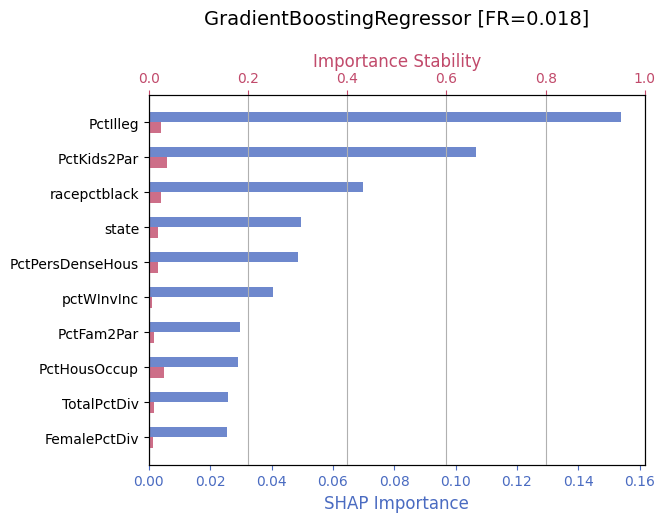

In [15]:
from holisticai.explainability.plots import plot_local_feature_importances_stability

top_n=10
plot_local_feature_importances_stability(local_importances, top_n=top_n, model_name='GradientBoostingRegressor')

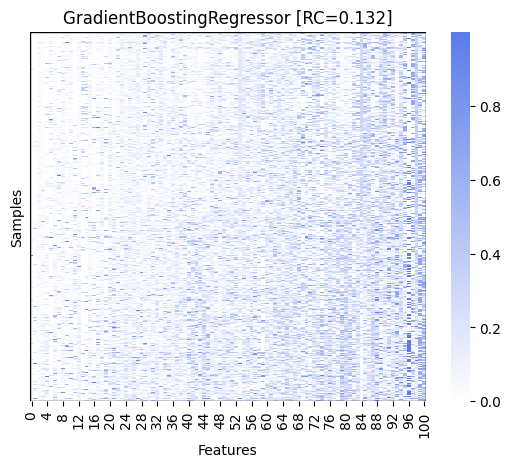

In [16]:
from holisticai.explainability.plots import plot_ranking_consistency

plot_ranking_consistency(local_importances, "GradientBoostingRegressor")